# Global Observations of Nonlinear Mesoscale Eddies 
## Introduction
<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to:</b>
    <li>Read in eddy-tracking datasets</li>
    <li>Process the datasets to only include WCR- and CCR-like eddies in the Northwest Atlantic</li>
    <li>Plot the formation patterns, seasonal cycles, and formation trends of the eddies</li>
</div>

### Datasets: 
☆<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html">The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0) </a> <br>
The primary dataset used in this notebook is *The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0)* and colloquially referred to the *Chelton eddy tracks* here. The current verison of the Chelton eddy dataset is described in <a href="https://www.aviso.altimetry.fr/fileadmin/documents/data/products/value-added/Schlax_Chelton_2016.pdf"> Schlax & Chelton, 2016</a> which built upon <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>. 

<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta3-1-exp-dt.html">The Mesoscale Eddy Trajectories Atlas (META3.1EXP) </a> <br>
The *Mesoscale Eddy Trajectories Atlas Product Verison 3.1 Experimental Delayed Time (META3.1EXP DT)* was first published in March 2022 and is an update to META2.0. The details of this dataset are described <a href="https://essd.copernicus.org/articles/14/1087/2022/"> Pegliasco et al., 2022</a> which inherited an eddy-tracking algorithm developed by <a href="https://journals.ametsoc.org/view/journals/atot/31/5/jtech-d-14-00019_1.xml"> Mason et al., 2014</a> that is inpsired by Chelton et al., 2011.

<a href="https://zenodo.org/record/7349753">The Global Lagrangian Eddy Dataset (GLED v1.0) </a> <br>
The third eddy dataset differs from the META datasets because it uses Lagrangian methods to identify and track eddies. This dataset was created by <a href="https://essd.copernicus.org/articles/15/1765/2023/"> Liu and Abernathy, 2023</a> as the Lagrangian alternative to Eulerian eddy datasets like the Chelton eddy tracks and all the successive Eulerian eddy datasets inspired by Chelton et al., 2011. 

<a href="https://www.bco-dmo.org/dataset/810182">Yearly census of Gulf Stream Warm Core Ring formation from 1980 to 2017</a><br>
The WCR census uses the <a href="https://jcgulfstream.com/charts/">Clark charts</a> to document the formation and demise times and locations, and the area at formation for all WCRs formed between 1980 and 2017 that lived for a week or more. 

### Motivation: 
<a href="https://www.nature.com/articles/s41598-019-48661-9"> Gangopadhyay et al., 2019</a> found a regime shift in the number of warm core rings formations between 1980–1999 and 2000–2017. <a href="https://www.nature.com/articles/s41598-021-81827-y"> Silver et al., 2021</a> expanded upon this work and also found a regime shift in warm core rings, but *no* regime shift in cold core rings. **We seek to understand if a regime shift, and similar results, can be detected using a global mesoscale eddy dataset such as META2.0.** 

<div class="alert alert-block alert-info">
<b>The goal of this work is to:</b>
    <li>Repeat similar analyses as Silver et al., 2021 for eddy datasets that have been filtered to only include warm core ring- and cold core ring-like eddies</li>
    <li>Check if these eddy datasets detect a regime shift in Gulf Stream rings</li>
    <li>Analyize the formation patterns, seasonal cycles, and formation trends of the eddies</li>
    <li>Test if META2.0 and similar products could be used to study Gulf Stream rings</li>
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> The META2.0 dataset, or Chelton eddy tracks, are no longer recommended for use. Instead, AVISO reccomends using META3.1EXP. When this project began, that warning did not exist and META3.1EXP had not been published. Hence why we primarily use the META2.0 dataset.
</div>
    
## Import Functions:

In [2]:
%%time
# adds upper level to working directory
import sys
sys.path.append("..")

# import the util functions
from utils.ring_data_utils import *
from utils.ring_plot_utils import *

CPU times: user 1.55 s, sys: 287 ms, total: 1.83 s
Wall time: 4.27 s


### File Structure

This project's folder looks like:<br>
<UL> <b>rings
      <UL> data <br>
      <UL> dataframes <br> </UL>
      <UL> GLED <br> </UL>
      <UL> gulf_stream <br> </UL>
      <UL> META <br> </UL>
      <UL> OISST <br> </UL>
      <UL> ring_census <br> </UL>
      <UL> SSH <br> </UL>
      <b>figures<br>
      <UL> animation_plots</UL>
      <b>rings_repo <br>
      <UL> <font color='red'>notebooks ☆</font> <br>
      utils <br></UL> </b> </b> </b> 
</UL>

## Process Data:
Only un-comment the cell below if you want to (re-)create these pandas dataframes (which are used in the rest of the notebook). After this cell has been run once, you will have all the necessary dataframes saved in the data/dataframes folder.

<br>
    
<UL> <b>data</b>
      <UL> <b>dataframes</b> <br>
      <UL> nwa_<font color='blue'>ccr</font>like_eddies.pkl <br> </UL>
      <UL> nwa_<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_mm_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
</UL>
</UL>
<br> 

<div class="alert alert-block alert-danger">
<b>Note:</b> If the DataFrames above already exist, do not run the next cell. Else, roceed to the "Load data" cell.
</div>

In [1]:
# %%time
# This function takes ~38 minutes to run, ~18 min per dataframe
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    meta_eddy_to_nwa_ringlike_eddies                                                                     "
"                                                                                                         "
" Description:                                                                                            "
"    The meta_eddy_to_nwa_ringlike_eddies function reads in META eddy datasets and converts it to         " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    path (String)         : path to where the META eddy dataset is stored                                "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# This function takes ~4 seconds to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    meta_eddy_to_nwa_ringlike_eddies                                                                     "
"                                                                                                         "
" Description:                                                                                            "
"    The eddy_df_to_formation_counts_df takes filtered wcr- & ccr-like eddy dataframes and creates        " 
"    dataframes that tally formations of rings for all zones by year (e.g., zone_wcr_yyyy_formations)     "
"    as well as formations by month and year (e.g., zone_wcr_yyyy_mm_formations) then saves those         "
"    dataframes in the data/dataframes folder.                                                            "
"                                                                                                         "
" Input:                                                                                                  " 
"    eddy_wcr_df (DataFrame) : pandas dataframe of eddy trajectories for wcr-like eddies                  "
"    eddy_ccr_dr (DataFrame) : pandas dataframe of eddy trajectories for ccr-like eddies                  "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                  :  saves formation counts dataframes in the data/dataframes folder           "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# How to proceed
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                                                                                         "
"  Uncomment the 3 lines below to create the ring-like eddy dataframes from the META2.0 eddy dataset      "
"  and create the formation counts dataframes. Note: make sure your path is correct                       "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# path_to_META2 = '/Users/elenaperez/Desktop/rings/data/META/META2_0/eddy_trajectory_dt_2.0_19930101_20200307.nc'
# meta_eddy_to_nwa_eddylike_rings(path_to_META2)
# eddy_df_to_formation_counts_df()


'""\n"                                                                                                         "\n"  Uncomment the 3 lines below to create the ring-like eddy dataframes from the META2.0 eddy dataset      "\n"  and create the formation counts dataframes. Note: make sure your path is correct                       "\n"                                                                                                         "\n'

## Load Data:

This project's data folder looks like:
<br>
    
<UL> <b>data</b>
      <UL> nwa_bathy.nc <br>
      <UL> <b>dataframes</b> <br>
          <UL> nwa_<font color='blue'>c</font>/<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
      <b>GLED</b> <br>
          <UL> eddy_info_30d.json <br> </UL>
          <UL> eddy_info_90d.json <br> </UL>
          <UL> eddy_info_180d.json <br> </UL>
      <b>gulf_stream</b> <br>
          <UL> GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat <br> </UL>
      <b>META</b> <br>
          <UL> <b> META2_0 </b> <br> 
              <UL> eddy_trajectory_dt_2.0_19930101_20200307.nc <br> </UL> </UL>
          <UL> <b> META3_1 </b> <br> 
              <UL> META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc <br> </UL>
              <UL> META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc <br> </UL> </UL>
      <b>OISST</b> <br>
              <UL> oisst-avhrr-v02r01.19950109.nc <br> </UL>
      <b>ring_census</b> <br>
              <UL> bcodmo_dataset_810182_712b_5843_9069 <br> </UL>
      <b>SSH</b> <br>
          <UL> sealevel_glo_phy_199301_201712.nc <br> </UL>
</UL>
</UL>
<br>

See "Datasets" for data availability of GLED, META, ring_census data. <br>
    
Gulf Stream daily paths are identified using the 25 cm sea surface height contour. See [Andres 2016](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL069966) for more information on deriving Gulf Stream paths. <br>
    
Sea surface temperature (SST) data is available through NOAA's 1/4° Daily Optimum Interpolation Sea Surface Temperature [(OISST)](https://www.ncei.noaa.gov/products/optimum-interpolation-sst). <br>

Monthly sea surface height (SSH) data is available through the Copernicus Marine Environment Monitoring Survey's (CMEMS) Global Ocean Gridded Sea Surface Height product [(SEALEVEL_GLO_PHY_L4_MY_008_047)](https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/description). <br>
    
Gridded bathymetry data of the worlds ocean is available from [GEBCO](https://www.gebco.net/data_and_products/gridded_bathymetry_data/). The bathymetry file I use is cut for the Northwest Atlantic 24N–53N, 82W–48W .<br>

<div class="alert alert-block alert-warning">
<b>Note:</b> Gulf Stream paths and bathymetry are read in for data processing (<i> utils/ring_data_utils.py </i>). SST and SSH data are read in for plotting (<i> utils/ring_plot_utils.py </i>).
</div>


In [3]:
%%time
# This cell takes about 25 ms to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META2.0 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# META2.0 ring-like eddies
zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_ccrlike_eddies.pkl')
zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_wcrlike_eddies.pkl') 

# annual formation counts by zone for zone_wcrs/ccrs
zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_wcr_yyyy_formations.pkl') 
zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_ccr_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_wcr_yyyy_mm_formations.pkl') 
zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_ccr_yyyy_mm_formations.pkl') 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META3.1 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                      GLED WCR- & CCR-like eddies                                        "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""



CPU times: user 11.7 ms, sys: 7.06 ms, total: 18.7 ms
Wall time: 21.6 ms


'""\n"                                      GLED WCR- & CCR-like eddies                                        "\n'

## Plot

These plots are used to 

### Map
Plot a map of the Northwest Atlantic and all the eddy tracks for the whole period (1993–2017) before filtering (anticyclonic & cyclonic eddies) and after filtering (WCR- & CCR-like eddies) .




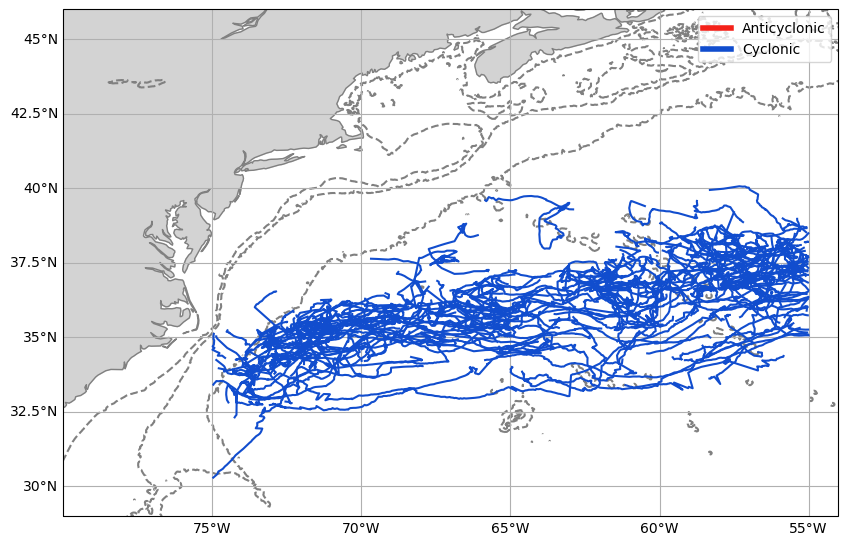

In [3]:
eddy_df = zone_ccrs
fig_quality = 100

# gangopadhyay census bounds
x_bnds = [-80,-54] # lon, NWA: [-82,-48]
y_bnds = [29,46] # lat, NWA: [24,53]

proj = ccrs.PlateCarree()

# create figure 
fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
fig.set_dpi(fig_quality)
#     fig.suptitle(title, fontsize=25, y=0.875)
    

## eddies ##
for i in np.array(eddy_df['track'].unique()):
    eddy = eddy_df[eddy_df['track']==i]        
    if (eddy['cyclonic_type']==1).all(): # if anti-cyclonic & north of the gulf stream
        ax.plot(eddy['longitude'],eddy['latitude'],color='#F42119')
    elif (eddy['cyclonic_type']==-1).all():
        ax.plot(eddy['longitude'],eddy['latitude'],color='#114DCE') #cyclonic
        
# axes formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
ax.coastlines(resolution='50m',color='gray')
ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='lightgray')  

# custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#F42119', lw=4), Line2D([0], [0], color='#114DCE', lw=4)]
ax.legend(custom_lines, ['Anticyclonic', 'Cyclonic'])

# gridlines
gl = ax.gridlines(crs=proj,draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER


### Spatial Distribution


### Seasonality


### Regime Shift



#### Changepoint Analysis
